# Connecting Google Drive to Github

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier

/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier


## Git commands
If you want to change some structure or code of this archive and commit to the main repository please request the author of code.

git status


git commit -m "message"

In [127]:
!git config --global user.email "vitor.yuichi@unesp.br"

In [136]:
!git push origin main

Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 888.28 KiB | 6.83 MiB/s, done.
Total 7 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: This repository moved. Please use the new location:
remote:   https://github.com/vitor-yuichi/TweetFlood.git
To https://github.com/vitor-yuichi/Frontiers.git
   cf043d9..581a3c0  main -> main


# Floods map
This data will be analyzed through a 2000 meters of spatial radius, starting from the 812A, 833A and 857A pluviometers.

We going to explore the first trimester data of 2019, including rain gauges, radar and Twitter data.

In [4]:
import pandas as pd
import folium
import numpy as np

In [5]:
floods=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/Alagamentos_2019.csv')

In [6]:
floods_points = floods[["LAT", "LONG"]]
floods_list=floods_points.values.tolist()

In [7]:
from folium.plugins import MarkerCluster
MarkerCluster()

In [8]:
floods.head()

,SEQ,LONG,LAT,LOCAL_ED,LOCALIZACA,REFERENCIA,DATA,MES,H_INICIO,H_FIM,...,latitude,longitude,nome,id_municip,rede,tipoestaca,geocodigo,cidade,xcoord,ycoord
0,7.0,-46.638806,-23.549408,PC DA BANDEIRA,PC DA BANDEIRA,AV VINTE E TRES DE MAIO-CENTROBAIRRO-SE,2019/01/01,1.0,18:34:00,19:23:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
1,13.0,-46.638580,-23.548910,PC DA BANDEIRA,PC DA BANDEIRA,ALTURA DO NUMERO 27-CENTROBAIRRO-SE,2019/01/03,1.0,17:27:00,17:42:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
2,14.0,-46.638240,-23.550330,AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO LIBERDADE,PC DA BANDEIRA-SANTANAAEROPORTO-SE,2019/01/03,1.0,19:43:00,20:18:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
3,15.0,-46.634830,-23.542110,TUN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II REPUBLICA,AV PRESTES MAIA-SANTANAAEROPORTO-SE,2019/01/03,1.0,19:52:00,20:04:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
4,22.0,-46.629470,-23.540356,R DA CANTAREIRA,R DA CANTAREIRA,AV MERCURIO-BAIRROCENTRO-SE,2019/01/04,1.0,14:45:00,15:03:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311


## Markers and Rain Gauges

In [122]:
!pip install geopandas

In [10]:
import geopandas
tamanduatei=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ALAG.zip')
all_floods=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/all_floods_2019.csv')

In [11]:
all_floods_coord=all_floods[['LAT', 'LONG']]
all_floods_list=all_floods_coord.values.tolist()

In [12]:
#https://fontawesome.com/v4/icons/
map = folium.Map(location=[-23.543311,-46.635987], zoom_start=12)
for point in range(0, len(all_floods_list)):
    folium.Marker(all_floods_list[point], all_floods['DATA'][point], icon=folium.Icon(color='black', icon='check-square', prefix='fa')).add_to(map)
folium.GeoJson(data=tamanduatei["geometry"]).add_to(map)
map

## Clusterization map

In [13]:
map2 = folium.Map(location=[-23.543311,-46.635987], tiles='CartoDB dark_matter', zoom_start=15)

marker_cluster =MarkerCluster().add_to(map2)

for point in range(0, len(all_floods_list)):
    folium.Marker(all_floods_list[point], popup=all_floods['REFERENCIA'][point]).add_to(marker_cluster)
map2

# Flood data processing  OUTPUT: df_trimester
Temporal cut : january to march (2019)

Adjusting to 812A, 833A and 857A rain gauges

The floods in this data correspond to the spatial radius of 2000 meters of the respective rain gauge.

## Importing archives and listing the dataframes

In [14]:
floods812=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_alags.csv')
floods833=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/833A_alags.csv')
floods857=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/857A_alags.csv')

In [15]:
len(floods812),len(floods833),len(floods857)

(158, 164, 162)

In [16]:
df_list_flood=[floods812, floods833, floods857]

## Temporal cut OUTPUT: df_trimester

df_trimester is a list of dataframes containing the floods in three different rain gauges

In [17]:
#changing the data format and filtering to the analyzed temporal window (trimester of 2019)
#df_trimester is a new list for the temporal window (list of dataframe)
df_trimester=list()
months=[1.0,2.0,3.0]
for k in df_list_flood:
  k['DATA']=pd.to_datetime(k['DATA']).dt.strftime('%Y-%m-%d')
  aux=k[k.MES.isin(months)]
  df_trimester.append(aux)

In [18]:
df_trimester[0]

,SEQ,LONG,LAT,LOCAL_ED,LOCALIZACA,REFERENCIA,DATA,MES,H_INICIO,H_FIM,DURACAO,DUR_H,id
0,15.0,-46.63483,-23.54211,TUN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II REPUBLICA,AV PRESTES MAIA-SANTANAAEROPORTO-SE,2019-01-03,1.0,19:52:00,20:04:00,00:12:00,0.20,NaN
1,22.0,-46.62947,-23.54036,R DA CANTAREIRA,R DA CANTAREIRA,AV MERCURIO-BAIRROCENTRO-SE,2019-01-04,1.0,14:45:00,15:03:00,00:18:00,0.30,NaN
2,28.0,-46.62756,-23.53926,R PAULA SOUSA,R PAULA SOUSA,AV DO ESTADO-AMBOS - LOCAL-SE,2019-01-04,1.0,15:04:00,15:53:00,00:49:00,0.82,NaN
3,32.0,-46.62704,-23.54312,AV MERCURIO,AV MERCURIO,PC S VITO-UNICO-SE,2019-01-04,1.0,15:56:00,17:56:00,02:00:00,2.00,NaN
4,33.0,-46.63050,-23.53974,AV SEN QUEIROS,AV SEN QUEIROS,ALTURA DO NUMERO 587-UNICO-SE,2019-01-04,1.0,17:52:00,19:30:00,01:38:00,1.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,670.0,-46.64988,-23.53705,AV S JOAO,AV S JOAO,AL GLETE-BAIRROCENTRO-PI,2019-03-11,3.0,08:30:00,14:09:00,05:39:00,5.65,NaN
80,678.0,-46.64135,-23.51515,AV OLAVO FONTOURA,AV OLAVO FONTOURA,R PROF MILTON RODRIGUES-AMBOS-ST,2019-03-11,3.0,08:48:00,09:50:00,01:02:00,1.03,NaN
81,699.0,-46.64996,-23.53704,AV S JOAO,AV S JOAO,ALTURA DO NUMERO 1821-BAIRROCENTRO-SE,2019-03-17,3.0,14:37:00,14:41:00,00:04:00,0.07,NaN
82,720.0,-46.64988,-23.53705,AV SAO JOAO,AV. S. JOAO,AL GLETE - BAIRRO/CENTRO,2019-03-20,3.0,07:44:00,07:59:00,00:15:00,0.25,NaN


# Twitter data processing OUTPUT: temporal_series

This section contains the processing of 833A and 857A geolocated tweets

## Importing data

In [19]:
tweet_833=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/833A_tweet_2019.csv')
tweet_857=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/tweets_857A.csv')
d1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_2019_JAN_2KM.csv')
d2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_2019_FEV_2KM.csv')
d3=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_2019_MAR_2KM.csv')


In [20]:
tweet_812=pd.concat([d1,d2,d3],ignore_index=True)


In [21]:
tweet_833.drop(columns=['id', 'username','retweets', 'favorites', 'permalink',
       'mentions', 'hashtags', 'geo', 'emojis', 'lang', 'verified',
       'replyCount', 'quoteCount', 'source', 'outlinks'], axis=1, inplace=True)

In [22]:
tweet_812.drop(columns=['id', 'username','retweets', 'favorites', 'permalink',
       'mentions', 'hashtags', 'geo', 'emojis', 'lang', 'verified',
       'replyCount', 'quoteCount', 'source', 'outlinks'], axis=1, inplace=True)

In [23]:
tweet_857.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

## Adjusting UTC to SP

In [24]:
#listing the dataframes
tweet_list=[tweet_812, tweet_833, tweet_857]

In [25]:
tweet_list[0].columns

Index(['date', 'text'], dtype='object')

In [26]:
import datetime
#this algorithm coverts UTC to America/São Paulo datetime and divide the time with the date
def UTC_SP(x):
  x['date']=pd.to_datetime(x.date)
  x.date= x.date.dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')
  x['Time'] = x['date'].dt.strftime('%H:%M')
  x['Date']=x['date'].dt.strftime('%Y-%m-%d')
  return x

In [27]:
tweet_list_trimester=[]
for k in tweet_list:
  aux=UTC_SP(k)
  tweet_list_trimester.append(aux)

In [28]:
tweet_list_trimester[1].head(3)

,date,text,Time,Date
0,2019-01-01 21:57:13-02:00,padrealessandrocampos #somostodospadrealessand...,21:57,2019-01-01
1,2019-01-01 21:54:32-02:00,Começando o ano com a melhor pessoa ao meu lad...,21:54,2019-01-01
2,2019-01-01 21:53:55-02:00,Acabou de publicar uma foto em Canzuá https://...,21:53,2019-01-01


## Filtering tweets with a list of words

* The filtering process consists of using keywords to select Twitter's posts.

* When a determine word is found in message, the tweet will be selected.

In [29]:
keywords=['chuva', 'chove', 'chuvoso', 'chuvosa', 'chuvarada']

In [30]:
def filter_twitter(post):
  return post[post.text.str.contains('\W|\W'.join(keywords), case=False,regex=True)]

In [31]:
tw_filter_list=[]
for k in tweet_list_trimester:
  aux=filter_twitter(k)
  tw_filter_list.append(aux)

In [32]:
tw_filter_list[1]

,date,text,Time,Date
117,2019-01-01 19:33:49-02:00,35’ de natação antes da chuva... \n.\n.\n\n.\n...,19:33,2019-01-01
250,2019-01-01 16:58:21-02:00,'O que dizer da chuva... já que todas às palav...,16:58,2019-01-01
1718,2019-01-02 08:52:17-02:00,'E o que dizer da chuva se já faltam palavras...,08:52,2019-01-02
1971,2019-01-03 21:20:29-02:00,Feliz e meiga após tomar chuva https://t.co/RG...,21:20,2019-01-03
1975,2019-01-03 21:14:54-02:00,Venci a chuva e a preguiça!\n\n#vem2019 #acade...,21:14,2019-01-03
...,...,...,...,...
85220,2019-03-28 18:32:13-03:00,Eu vejo surgir teus poetas de campos espaços ...,18:32,2019-03-28
85453,2019-03-28 14:01:29-03:00,#tbt chuva de raio laser #clubculture em São ...,14:01,2019-03-28
85491,2019-03-28 13:05:15-03:00,São Paulo às 9h e 18h.\nDica: Guarda-chuva e c...,13:05,2019-03-28
88385,2019-03-31 16:03:43-03:00,Uma vez me disseram que dançar na chuva é libe...,16:03,2019-03-31


## Temporal Word Series

In [33]:
# generating a date series (temporal series frequency of words in tweets)
import datetime

dt = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 4, 1)
step = datetime.timedelta(days=1)
date_series = []
while dt < end:
    date_series.append(dt.strftime('%Y-%m-%d'))
    dt += step

In [34]:
np.array(date_series)[1]==np.array(tw_filter_list[0].Date.unique())[1]

False

In [35]:
temporal_series=pd.DataFrame(np.array(date_series).tolist(), columns=['data'])
temporal_series

,data
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
85,2019-03-27
86,2019-03-28
87,2019-03-29
88,2019-03-30


In [36]:
import re
counter=0
temporal_series_dict={'words_fr_812a':[], 'words_fr_833a':[], 'words_fr_857a':[]}
pos=0
for key in list(temporal_series_dict.keys()):
  for x in np.array(date_series):
    variable=tw_filter_list[pos][tw_filter_list[pos].Date==x]
    for v in range(0, len(variable.text)):
      for p in keywords:
        if (re.search(p, variable.iloc[v,1], re.IGNORECASE)!=None):
          counter+=1
    temporal_series_dict[key].append(counter)
    counter=0
  pos+=1


In [37]:
for var in list(temporal_series_dict.keys()):
  temporal_series[var]=temporal_series_dict[var]

In [38]:
temporal_series.head(5)

,data,words_fr_812a,words_fr_833a,words_fr_857a
0,2019-01-01,0,2,3
1,2019-01-02,0,1,1
2,2019-01-03,3,5,2
3,2019-01-04,0,5,4
4,2019-01-05,1,11,8


## Tweet Frequence


In [39]:
for value in range(0, len(tw_filter_list)):
  temporal_series=temporal_series.merge(tw_filter_list[value].Date.value_counts().to_frame(), how='left',
                      left_on='data', right_on=tw_filter_list[value].Date.value_counts().to_frame().index )



In [40]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,Date_x,Date_y,Date
0,2019-01-01,0,2,3,NaN,2.0,3.0
1,2019-01-02,0,1,1,NaN,1.0,1.0
2,2019-01-03,3,5,2,3.0,5.0,2.0
3,2019-01-04,0,5,4,NaN,5.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0
...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,NaN,NaN,NaN
86,2019-03-28,0,3,3,NaN,3.0,3.0
87,2019-03-29,0,0,0,NaN,NaN,NaN
88,2019-03-30,0,0,0,NaN,NaN,NaN


In [41]:
temporal_series.rename(columns={'Date_x':'tw_812', 'Date_y':'tw_833', 'Date': 'tw_857'}, inplace=True)

In [42]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857
0,2019-01-01,0,2,3,NaN,2.0,3.0
1,2019-01-02,0,1,1,NaN,1.0,1.0
2,2019-01-03,3,5,2,3.0,5.0,2.0
3,2019-01-04,0,5,4,NaN,5.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0
...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,NaN,NaN,NaN
86,2019-03-28,0,3,3,NaN,3.0,3.0
87,2019-03-29,0,0,0,NaN,NaN,NaN
88,2019-03-30,0,0,0,NaN,NaN,NaN


# Integration of Twitter processed data with floods

In [43]:
for value in range(0, len(df_trimester)):
  temporal_series=temporal_series.merge(df_trimester[value].DATA.value_counts(), how='left', left_on='data',
                      right_on=df_trimester[value].DATA.value_counts().to_frame().index)

In [44]:
temporal_series.rename(columns={'DATA_x': 'floods_812', 'DATA_y': 'floods_833', 'DATA': 'floods_857'}, inplace=True)

In [45]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857
0,2019-01-01,0,2,3,NaN,2.0,3.0,NaN,1.0,1.0
1,2019-01-02,0,1,1,NaN,1.0,1.0,NaN,NaN,NaN
2,2019-01-03,3,5,2,3.0,5.0,2.0,1.0,3.0,3.0
3,2019-01-04,0,5,4,NaN,5.0,4.0,4.0,4.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
86,2019-03-28,0,3,3,NaN,3.0,3.0,1.0,1.0,NaN
87,2019-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
88,2019-03-30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Documentation for the temporal_series dataframe

If you don't know what is the value in a column call the following command:

documentation_temporal_serie['insert column here'].

In [46]:
documentation_temporal_series={'Documentation': 'This variable explains each variable', 'data':'Temporal window of analysis',
 'words_fr_833a': 'Words frequence in 833A rain gauge', 'words_fr_857a': 'Words frequence in 857A rain gauge',
 'floods_833': 'Floods frequence in 833A rain gauge', 'floods_857': 'Words Frequence in 857A rain gauge'}

In [47]:
temporal_series.fillna(0)

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857
0,2019-01-01,0,2,3,0.0,2.0,3.0,0.0,1.0,1.0
1,2019-01-02,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
2,2019-01-03,3,5,2,3.0,5.0,2.0,1.0,3.0,3.0
3,2019-01-04,0,5,4,0.0,5.0,4.0,4.0,4.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86,2019-03-28,0,3,3,0.0,3.0,3.0,1.0,1.0,0.0
87,2019-03-29,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
88,2019-03-30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
temporal_series=temporal_series.fillna(0)

In [49]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857
0,2019-01-01,0,2,3,0.0,2.0,3.0,0.0,1.0,1.0
1,2019-01-02,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
2,2019-01-03,3,5,2,3.0,5.0,2.0,1.0,3.0,3.0
3,2019-01-04,0,5,4,0.0,5.0,4.0,4.0,4.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86,2019-03-28,0,3,3,0.0,3.0,3.0,1.0,1.0,0.0
87,2019-03-29,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
88,2019-03-30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
temporal_series.to_csv('whole_data_mdpi.csv')

# Boxplot generation

## Boxplot for 833A rain gauge


<ipython-input-51-81707bb978a6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Non-flood day', 'Floods day'])


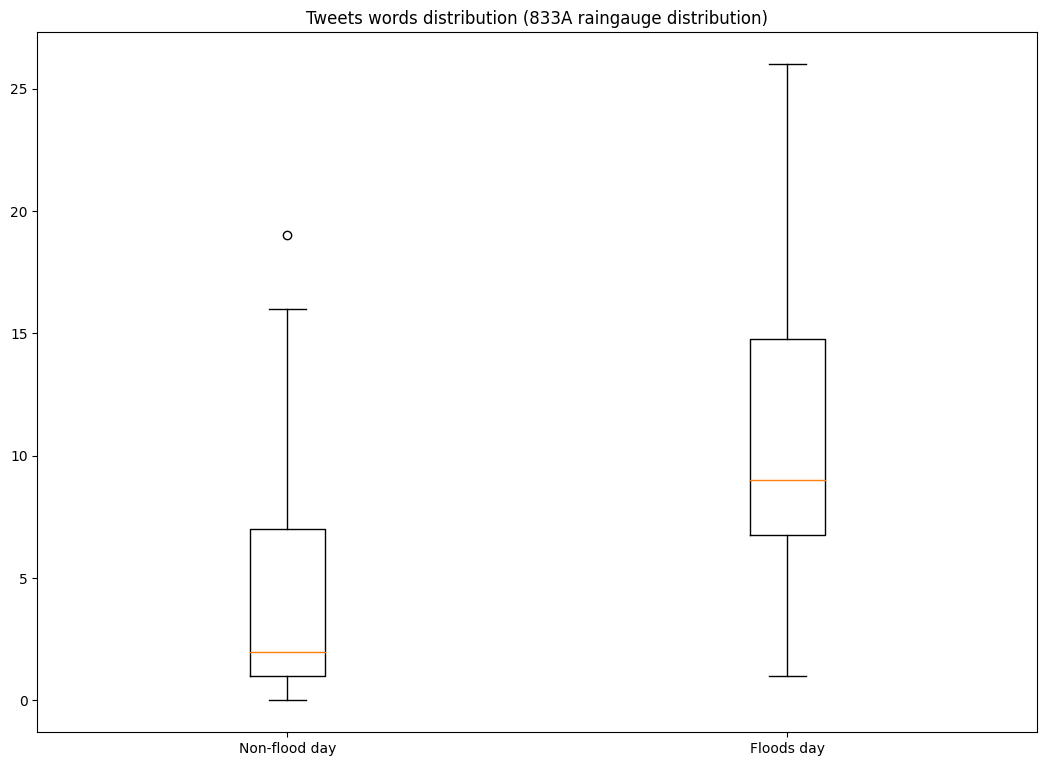

In [51]:
import matplotlib.pyplot as plt
import numpy as np

data = [temporal_series[temporal_series.floods_833==0]['words_fr_833a'], temporal_series[temporal_series.floods_833!=0]['words_fr_833a']]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Non-flood day', 'Floods day'])
ax.set_title('Tweets words distribution (833A raingauge distribution)')
# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

## Boxplot for 857A rain gauge

<ipython-input-52-dda57247dfeb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Non-flood day', 'Floods day'])


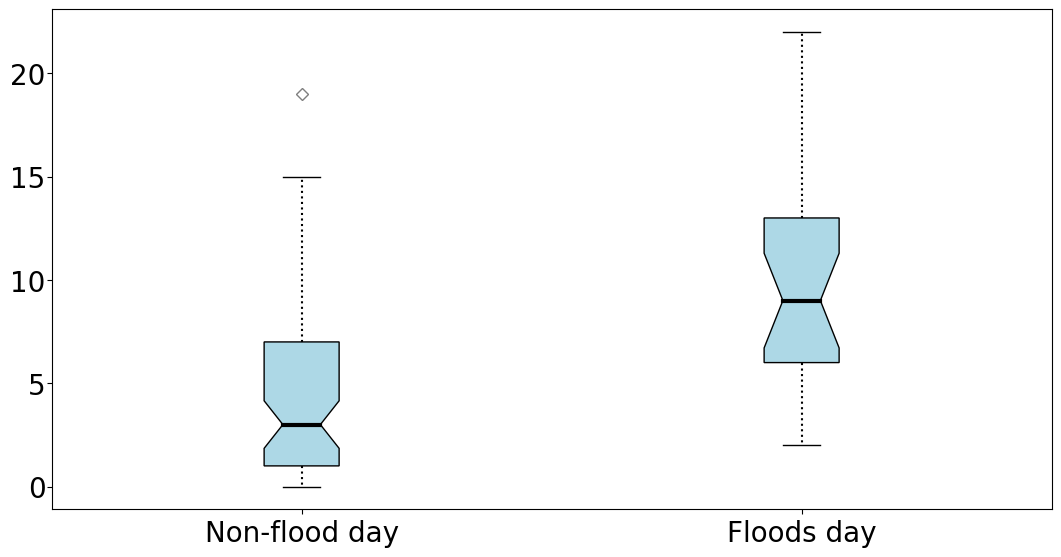

In [52]:
import matplotlib.pyplot as plt
import numpy as np

data = [temporal_series[temporal_series.floods_857==0]['words_fr_857a'], temporal_series[temporal_series.floods_857!=0]['words_fr_857a']]

fig = plt.figure(figsize =(10, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Non-flood day', 'Floods day'])

ax.tick_params(axis='y', which='major', pad=1)
bp = ax.boxplot(data, showmeans=False, notch=True,patch_artist=True )
colors = [ 'lightblue', 'lightblue']
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.tick_params(axis='both', which='both', labelsize=20)

plt.show()

## Boxplot for 812A rain gauge

<ipython-input-53-12bc8fe3cfea>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Non-flood day', 'Floods day'])


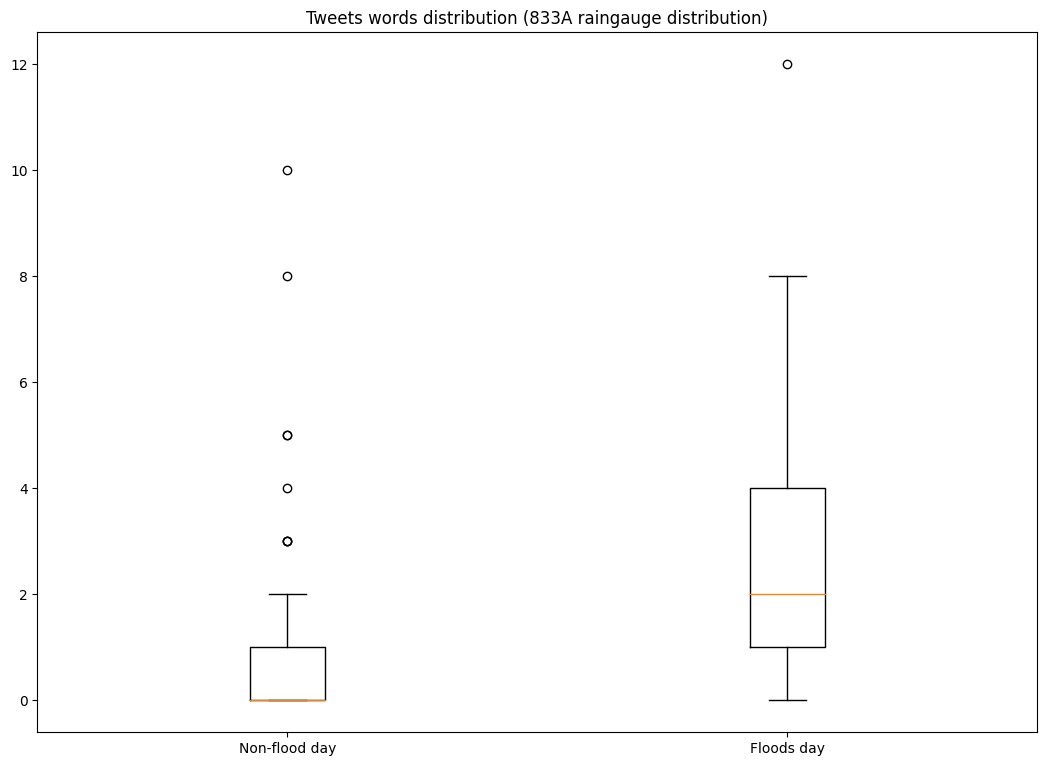

In [53]:
import matplotlib.pyplot as plt
import numpy as np

data = [temporal_series[temporal_series.floods_812==0]['words_fr_812a'], temporal_series[temporal_series.floods_812!=0]['words_fr_812a']]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Non-flood day', 'Floods day'])
ax.set_title('Tweets words distribution (833A raingauge distribution)')
# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

## All plots in once

In [54]:
tables=[temporal_series[temporal_series.floods_812==0][['data' ,'words_fr_812a']],
temporal_series[temporal_series.floods_812!=0][['data' ,'words_fr_812a']],
temporal_series[temporal_series.floods_833==0][['data' ,'words_fr_833a']],
temporal_series[temporal_series.floods_833!=0][['data' ,'words_fr_833a']],
temporal_series[temporal_series.floods_857==0][['data' ,'words_fr_857a']],
temporal_series[temporal_series.floods_857!=0][['data' ,'words_fr_857a']]]

sheets_name=['Non-flood day 812A', 'Floods day 812A', 'Non-flood day 833A', 'Floods day 833A',
                    'Non-floods day 857A', 'Floods day 857A']


In [55]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 1.5 MB/s eta 0:00:00


In [56]:
writer = pd.ExcelWriter('MyFile.xlsx', engine='xlsxwriter')

#store your dataframes in a  dict, where the key is the sheet name you want
frames = {'Non-flood day 812A': temporal_series[temporal_series.floods_812==0][['data' ,'words_fr_812a']], 'Floods day 812A': temporal_series[temporal_series.floods_812!=0][['data' ,'words_fr_812a']],
        'Non-flood day 833A': temporal_series[temporal_series.floods_833==0][['data' ,'words_fr_833a']], 'Floods day 833A':temporal_series[temporal_series.floods_833!=0][['data' ,'words_fr_833a']],
        'Non-floods day 857A':temporal_series[temporal_series.floods_857==0][['data' ,'words_fr_857a']], 'Floods day 857A': temporal_series[temporal_series.floods_857!=0][['data' ,'words_fr_857a']]}

#now loop thru and put each on a specific sheet
for sheet, frame in  frames.items(): # .use .items for python 3.X
    frame.to_excel(writer, sheet_name = sheet)

#critical last step
writer.save()

<ipython-input-56-5704558ac83f>:13: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


<ipython-input-57-49a096003e80>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Non-flood day 812A', 'Floods day 812A', 'Non-flood day 833A', 'Floods day 833A',


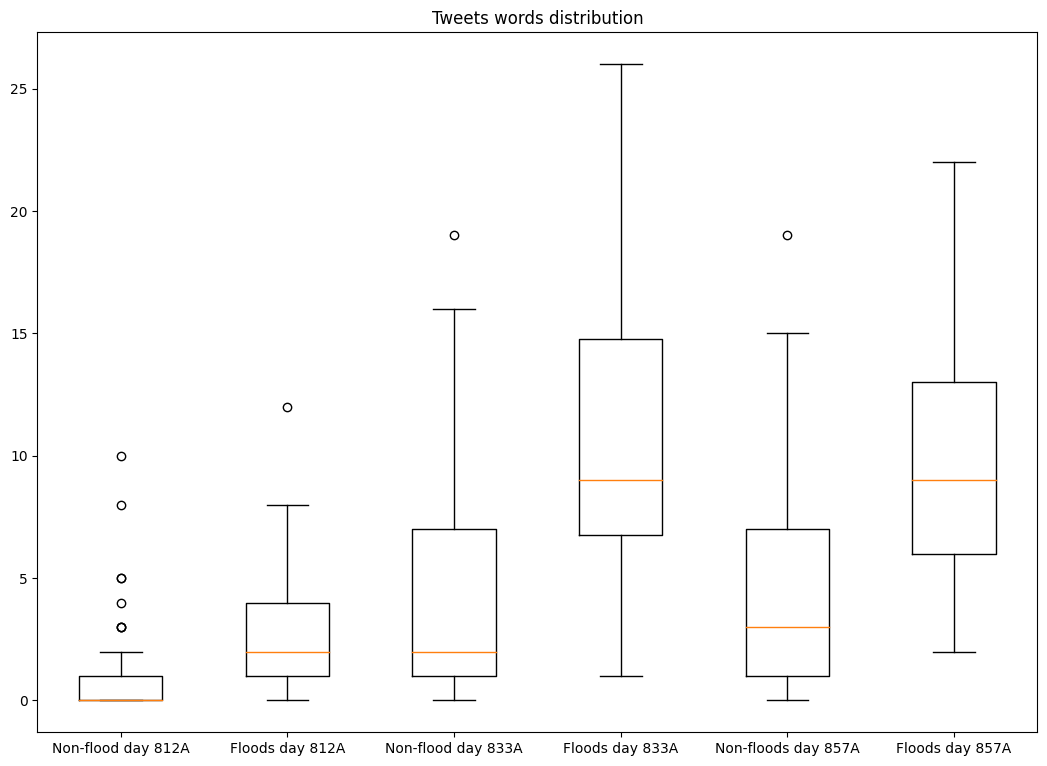

In [57]:
import matplotlib.pyplot as plt
import numpy as np

data =  [temporal_series[temporal_series.floods_812==0]['words_fr_812a'], temporal_series[temporal_series.floods_812!=0]['words_fr_812a'],
        temporal_series[temporal_series.floods_833==0]['words_fr_833a'], temporal_series[temporal_series.floods_833!=0]['words_fr_833a'],
        temporal_series[temporal_series.floods_857==0]['words_fr_857a'], temporal_series[temporal_series.floods_857!=0]['words_fr_857a']]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Non-flood day 812A', 'Floods day 812A', 'Non-flood day 833A', 'Floods day 833A',
                    'Non-floods day 857A', 'Floods day 857A'])
ax.set_title('Tweets words distribution')
# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [58]:
la=['Non-flood day 812A', 'Floods day 812A', 'Non-flood day 833A', 'Floods day 833A',
                    'Non-floods day 857A', 'Floods day 857A']
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [59]:
get_box_plot_data(la, bp).to_csv('boxplot.csv')

In [60]:
temporal_series.columns

Index(['data', 'words_fr_812a', 'words_fr_833a', 'words_fr_857a', 'tw_812',
       'tw_833', 'tw_857', 'floods_812', 'floods_833', 'floods_857'],
      dtype='object')

# Mann Whitney Test for boxplot OUTPUT: mannwhitney

In [61]:
pvalue=[]
score=[]
aux=0
from scipy import stats
for i in temporal_series.iloc[:, 7: len(temporal_series.columns)].columns:
  x,y=stats.mannwhitneyu(temporal_series[temporal_series[i]==0][temporal_series.iloc[:, 1:4].columns[aux]].array,
                         temporal_series[temporal_series[i]!=0][temporal_series.iloc[:, 1:4].columns[aux]].array,
                         alternative='two-sided')
  score.append(x)
  pvalue.append(y)

In [62]:
pvalue

[1.2671594498416117e-05, 4.200178865108641e-06, 6.153528785923256e-07]

In [63]:
score

[367.5, 368.0, 260.0]

In [64]:
temporal_series.iloc[:, 7: len(temporal_series.columns)].columns

Index(['floods_812', 'floods_833', 'floods_857'], dtype='object')

In [65]:
temporal_series.iloc[:, 1:4].columns[0]

'words_fr_812a'

In [66]:
mannwhitney=pd.DataFrame(list(zip(score, pvalue)), columns=['score', 'pvalue'],index=temporal_series.iloc[:, 7: len(temporal_series.columns)].columns )

In [67]:
mannwhitney

,score,pvalue
floods_812,367.5,1.267159e-05
floods_833,368.0,4.200179e-06
floods_857,260.0,6.153529e-07


# Correlation analysis

## Importing rain gauge data and processing for analysis (833A)

In [68]:
gauge_833=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/pluvio_833.csv')

In [69]:
gauge_833.drop(columns=['Time', 'Date'], inplace=True)

In [70]:
def UTC_SP_gauges(x):
  x['datahora']=pd.to_datetime(x.datahora)
  x.datahora= x.datahora.dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')
  x['Time'] = x['datahora'].dt.strftime('%H:%M')
  x['Date']=x['datahora'].dt.strftime('%Y-%m-%d')
  return x

## Import from 812A rain gauge

In [71]:
data1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/data1.csv', sep=';', decimal=',', index_col=False)
data2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/data2.csv', sep=';', decimal=',', index_col=False)
data3=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/data3.csv', sep=';', decimal=',', index_col=False)

In [72]:
data1=data1[data1.codEstacao=='355030812A']
data2=data2[data2.codEstacao=='355030812A']
data3=data3[data3.codEstacao=='355030812A']

In [73]:
pluvio_data = pd.merge(data1,data2, how = 'outer')
gauge_812 = pd.merge(pluvio_data,data3, how = 'outer')

In [74]:
gauges_list=[gauge_812, gauge_833]

In [75]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet
gauge_812.to_excel(writer, sheet_name='812a')
gauge_833.to_excel(writer, sheet_name='833a')
df_trimester[0].to_excel(writer, sheet_name='floods_812a')
df_trimester[1].to_excel(writer, sheet_name='floods_833a')
df_trimester[2].to_excel(writer, sheet_name='floods_857a')
# Close the Pandas Excel writer and save the file
writer.close()

## Converting datetime

In [76]:
gauges_converted=[]
for column in gauges_list:
  gauges_converted.append(UTC_SP_gauges(column))


In [77]:
gauges_converted[0]

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida,Time,Date
0,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2018-12-31 22:20:00-02:00,0.0,22:20,2018-12-31
1,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2018-12-31 23:20:00-02:00,0.0,23:20,2018-12-31
2,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-01-01 00:20:00-02:00,0.0,00:20,2019-01-01
3,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-01-01 01:20:00-02:00,0.0,01:20,2019-01-01
4,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-01-01 02:20:00-02:00,0.0,02:20,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
5270,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-03-31 16:20:00-03:00,0.0,16:20,2019-03-31
5271,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-03-31 17:20:00-03:00,0.0,17:20,2019-03-31
5272,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-03-31 18:20:00-03:00,0.0,18:20,2019-03-31
5273,SÃO PAULO,355030812A,SP,Luz,-46.632533,-23.531015,2019-03-31 19:20:00-03:00,0.0,19:20,2019-03-31


## Grouping the rain gauges by mean

In [78]:
gauge_mean=[]
for values in gauges_converted:
  gauge_mean.append(values.groupby('Date')['valorMedida'].sum())

In [79]:
for value in range(0, len(gauge_mean)):
  gauge_mean[value].drop(index='2018-12-31', inplace=True)

In [80]:
temporal_series.iloc[0,0]==gauge_mean[0].index[0]

True

In [81]:
correlation_temporal=gauge_mean[0].to_frame().merge(gauge_mean[1], how='left', left_on=gauge_mean[0].index,
                               right_on=gauge_mean[1].index)

In [82]:
correlation_temporal.rename(columns={'key_0':'Date', 'valorMedida_x': 'gauge_833', 'valorMedida_y': 'gauge812'}, inplace=True)

In [83]:
correlation_temporal

,Date,gauge_833,gauge812
0,2019-01-01,4.72,4.0
1,2019-01-02,0.00,4.2
2,2019-01-03,18.26,2.8
3,2019-01-04,26.34,3.8
4,2019-01-05,16.00,4.0
...,...,...,...
85,2019-03-27,0.00,0.0
86,2019-03-28,0.00,0.0
87,2019-03-29,0.00,0.0
88,2019-03-30,0.00,0.0


Valor máximo para pluviômetro 833: 35.05 mm
\\
Valor máximo para pluviômetro 812: 56.14 mm

In [84]:
correlation_temporal[correlation_temporal.gauge_833 == max(correlation_temporal.gauge_833)]

,Date,gauge_833,gauge812
48,2019-02-18,35.05,8.6


In [85]:
max(correlation_temporal.gauge812)

56.14

## Radar Data

## Importing radar data

- 857A, lat: -23,541000000000000 long: -46,628999999999998 - P2
- 833A,  lat: -23,543310999999999, long: -46,635987000000000 - P3

In [86]:
radar=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/radar_2019.csv', decimal='.')

In [87]:
radar

,date,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25
0,2019-01-01,3.173042,3.226428,4.195124,3.648779,4.265342,5.528599,4.249552,3.934576,6.090778,...,5.142183,2.907812,5.841916,3.983348,6.387280,5.346278,4.68607,6.471430,6.455297,4.995254
1,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,2019-01-03,0.538214,1.364832,3.748662,0.328663,1.312184,3.276037,0.000000,0.548827,1.715840,...,0.000000,1.767333,0.520885,2.978153,1.073091,5.860077,8.40729,7.042633,4.372618,4.036467
3,2019-01-04,6.604355,5.292353,5.111798,5.803730,5.392729,6.325717,6.465143,5.510314,5.177933,...,5.678999,4.603361,4.920952,3.998323,6.206038,7.837138,6.72293,6.550174,6.737576,6.960659
4,2019-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
86,2019-03-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87,2019-03-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
88,2019-03-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [88]:
radar=radar[['date', 'p2', 'p3', 'p4']]

In [89]:
radar.rename(columns={'date':'data', 'p2':'radar_857', 'p3': 'radar_833', 'p4': 'radar_812'}, inplace=True)

<ipython-input-89-59034e84460e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radar.rename(columns={'date':'data', 'p2':'radar_857', 'p3': 'radar_833', 'p4': 'radar_812'}, inplace=True)


## Radar | Rain Gauges | Twitter integration OUTPUT: integratin_data1

In [90]:
integration_data=temporal_series

In [91]:
radar.iloc[0,0]==integration_data.iloc[0,0]

True

In [92]:
cols=radar.columns.difference(integration_data.columns)

In [93]:
cols1=correlation_temporal.columns.difference(integration_data.columns)

In [94]:
integration_data1=pd.merge(integration_data, radar[cols], how='left', left_on='data',
                               right_on=np.array(radar.data))

In [95]:
integration_data1=pd.merge(integration_data1, correlation_temporal[cols1], how='left', left_on='data',
                               right_on='Date')

In [96]:
integration_data1.drop(columns='Date', inplace=True)

In [137]:
integration_data1.to_csv('MainDataProcessed.csv', index = None)

In [98]:
integration_data1.columns

Index(['data', 'words_fr_812a', 'words_fr_833a', 'words_fr_857a', 'tw_812',
       'tw_833', 'tw_857', 'floods_812', 'floods_833', 'floods_857',
       'radar_812', 'radar_833', 'radar_857', 'gauge812', 'gauge_833'],
      dtype='object')

In [99]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, subplot_titles=('(a)', '(b)', '(c)'), shared_yaxes='all')

fig.append_trace(go.Scatter(
    x=integration_data1.data,
    y=integration_data1.words_fr_812a,
    name='Number of tweets',
    line = dict(color='red')
), row=1, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.floods_812,
                         mode='markers', marker=dict(size= [i * 3 for i in integration_data.floods_812],
                                                     color="grey"),name='Number of Floods'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.gauge812,
                         name="Rainfall accumulated (Rain Gauge [mm])",
                         line=dict(color='blue')),
              row=1, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.radar_812,
                         name="Rainfall accumulated (Radar [mm])",
                         line=dict(color='orange')),
              row=1, col=1)
####
fig.append_trace(go.Scatter(
    x=integration_data1.data,
    y=integration_data1.words_fr_833a,
     name='Number of tweets',
     line = dict(color='red')
), row=2, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.floods_833,
                         mode='markers', marker=dict(size= [i * 3 for i in integration_data.floods_833],
                                                     color="grey"),name='Number of Floods'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.gauge_833,
                         name="Rainfall accumulated (Rain Gauge [mm])",
                          line = dict(color='blue')
                          ),
              row=2, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.radar_833,
                         name="Rainfall accumulated (Radar [mm])",
              line = dict(color='orange')),
              row=2, col=1)
####

fig.append_trace(go.Scatter(
    x=integration_data1.data,
    y=integration_data1.words_fr_857a,
     name='Number of tweets',
     line = dict(color='red')

), row=3, col=1)

fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.floods_857,
                         mode='markers', marker=dict(size= [i * 3 for i in integration_data.floods_857],
                                                     color="grey"),name='Number of Floods',
                         ),
              row=3, col=1)


fig.add_trace(go.Scatter(x=integration_data1.data,
                         y=integration_data1.radar_857,
                         name="Rainfall accumulated (Radar [mm])",
                         line = dict(color='orange')
                         ),
              row=3, col=1)

fig.update_layout(height=800, width=900,
                template ='seaborn',
                legend=dict(
        x=0.5,
        y=-0.3,
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=0.5,
        itemsizing= 'constant',
        orientation="h",
    itemwidth=50,
    yanchor="bottom",
    xanchor="center"

    )
                )
fig.update_xaxes(title_text ='Temporal window')
fig.update_yaxes(title_text ='Data measure')

names = set()
fig.for_each_trace(
    lambda trace:
        trace.update(showlegend=False)
        if (trace.name in names) else names.add(trace.name))
fig.show()


Radar 812A pico máximo em 2019-01-19 : 38.40 Alagamentos 812A: 0

Radar 833A pico máximo em 2019-03-05: 33.03 Alagamentos 833A: 5

Radar 857A pico máximo em 2019-01-19: 31.72 Alagamentos 857A: 5

Pluviômetro 812A pico máximo em 2019-02-04: 56.14 Alagamento 812A: 5

Pluviômetro 833A pico máximo em 2019-02-18: 35.05 Alagamento 833A: 0

Flood 812A 2019-03-11 11 gauge 812 =43.9

Flood 833A 2019-02-21 9 gauge 833 = 27.49

Flood 857A 2019-02-21 9 gauge -- radar 12.10

tweet 812a 2019-03-02: 12

tweet 833a 2019-02-06: 12

tweet 857a 2019-02-06,2019-02-16, 2019-03-11: 12

In [100]:
integration_data1[integration_data1.words_fr_857a==max(integration_data1.words_fr_857a)]

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857,radar_812,radar_833,radar_857,gauge812,gauge_833
36,2019-02-06,1,26,22,1.0,24.0,20.0,4.0,2.0,5.0,8.326138,7.345766,7.423708,16.74,10.80
46,2019-02-16,8,25,22,8.0,24.0,21.0,3.0,2.0,2.0,13.506929,13.893734,12.637192,14.20,22.33
69,2019-03-11,2,21,22,2.0,20.0,21.0,11.0,3.0,3.0,0.000000,0.000000,0.000000,43.90,27.49


In [101]:
integration_data1[integration_data1.radar_833==max(integration_data1.radar_833)]

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857,radar_812,radar_833,radar_857,gauge812,gauge_833
63,2019-03-05,5,9,6,5.0,9.0,6.0,4.0,5.0,5.0,7.776849,33.032321,18.554607,16.36,8.12


In [102]:
integration_data1[integration_data1.radar_857==max(integration_data1.radar_857)]

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857,radar_812,radar_833,radar_857,gauge812,gauge_833
18,2019-01-19,0,3,3,0.0,3.0,3.0,0.0,0.0,0.0,38.403392,11.02907,31.720935,5.0,0.0


# Statistical tests

## Anderson Darling | Shapiro Normality test
If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.

In [103]:
integration_data1.columns

Index(['data', 'words_fr_812a', 'words_fr_833a', 'words_fr_857a', 'tw_812',
       'tw_833', 'tw_857', 'floods_812', 'floods_833', 'floods_857',
       'radar_812', 'radar_833', 'radar_857', 'gauge812', 'gauge_833'],
      dtype='object')

In [104]:
integration_data1.iloc[:, 10:15].columns.tolist()


['radar_812', 'radar_833', 'radar_857', 'gauge812', 'gauge_833']

In [105]:
statistics={'anderson_score': [], 'anderson_critical_value':[], 'shapiro_score': [],
            'shapiro_pvalue':[], 'sensor': integration_data1.iloc[:, 10:15].columns.tolist()}
for value in integration_data1.iloc[:, 10:15].columns.tolist():
  statistics['anderson_score'].append(round(stats.anderson(np.array(integration_data1[value]), dist='norm')[0], 3))
  statistics['anderson_critical_value'].append(round(stats.anderson(np.array(integration_data1[value]), dist='norm')[1][2],3))
  statistics['shapiro_score'].append(round(stats.shapiro(np.array(integration_data1[value]))[0],3))
  statistics['shapiro_pvalue'].append(round(stats.shapiro(np.array(integration_data1[value]))[1],7))

In [106]:
stat=pd.DataFrame(statistics)

In [107]:
stat

,anderson_score,anderson_critical_value,shapiro_score,shapiro_pvalue,sensor
0,14.552,0.756,0.541,0.000000,radar_812
1,14.885,0.756,0.567,0.000000,radar_833
2,15.720,0.756,0.558,0.000000,radar_857
3,7.553,0.756,0.688,0.000000,gauge812
4,2.561,0.756,0.903,0.000006,gauge_833


## Spearman Correlation

## Correlation for 812A

In [108]:
integration_data1[['tw_812', 'floods_812', 'radar_812', 'gauge812']].corr(method='spearman')

,tw_812,floods_812,radar_812,gauge812
tw_812,1.000000,0.480470,0.419809,0.525129
floods_812,0.480470,1.000000,0.475234,0.477626
radar_812,0.419809,0.475234,1.000000,0.416333
gauge812,0.525129,0.477626,0.416333,1.000000


In [109]:
from scipy.stats import spearmanr
corrs, pvals = spearmanr(integration_data1[['tw_812', 'floods_812', 'radar_812', 'gauge812']], axis=0)
pvals

array([[0.00000000e+00, 1.64596844e-06, 3.80563465e-05, 1.07430313e-07],
       [1.64596844e-06, 0.00000000e+00, 2.21151859e-06, 1.93355901e-06],
       [3.80563465e-05, 2.21151859e-06, 0.00000000e+00, 4.47687974e-05],
       [1.07430313e-07, 1.93355901e-06, 4.47687974e-05, 0.00000000e+00]])

In [110]:
corrs

array([[1.        , 0.48046981, 0.4198089 , 0.52512946],
       [0.48046981, 1.        , 0.47523438, 0.47762604],
       [0.4198089 , 0.47523438, 1.        , 0.41633255],
       [0.52512946, 0.47762604, 0.41633255, 1.        ]])

## Correlation for 833


In [111]:
import seaborn as sns

In [112]:
integration_data1[['tw_833', 'floods_833', 'radar_833', 'gauge_833']].corr(method='spearman')
sns.set(rc={'figure.figsize':(40,15)})

In [113]:
integration_data1[['tw_833', 'floods_833', 'radar_833', 'gauge_833']].corr(method='spearman')

,tw_833,floods_833,radar_833,gauge_833
tw_833,1.000000,0.480331,0.549783,0.656553
floods_833,0.480331,1.000000,0.602804,0.449203
radar_833,0.549783,0.602804,1.000000,0.414963
gauge_833,0.656553,0.449203,0.414963,1.000000


In [114]:
corrs, pvals = spearmanr(integration_data1[['tw_833', 'floods_833', 'radar_833', 'gauge_833']], axis=0)
pvals

array([[0.00000000e+00, 1.65903325e-06, 1.99636449e-08, 2.12775373e-12],
       [1.65903325e-06, 0.00000000e+00, 3.24458959e-10, 8.95293203e-06],
       [1.99636449e-08, 3.24458959e-10, 0.00000000e+00, 4.77040182e-05],
       [2.12775373e-12, 8.95293203e-06, 4.77040182e-05, 0.00000000e+00]])

### Correlations plots

<Axes: >

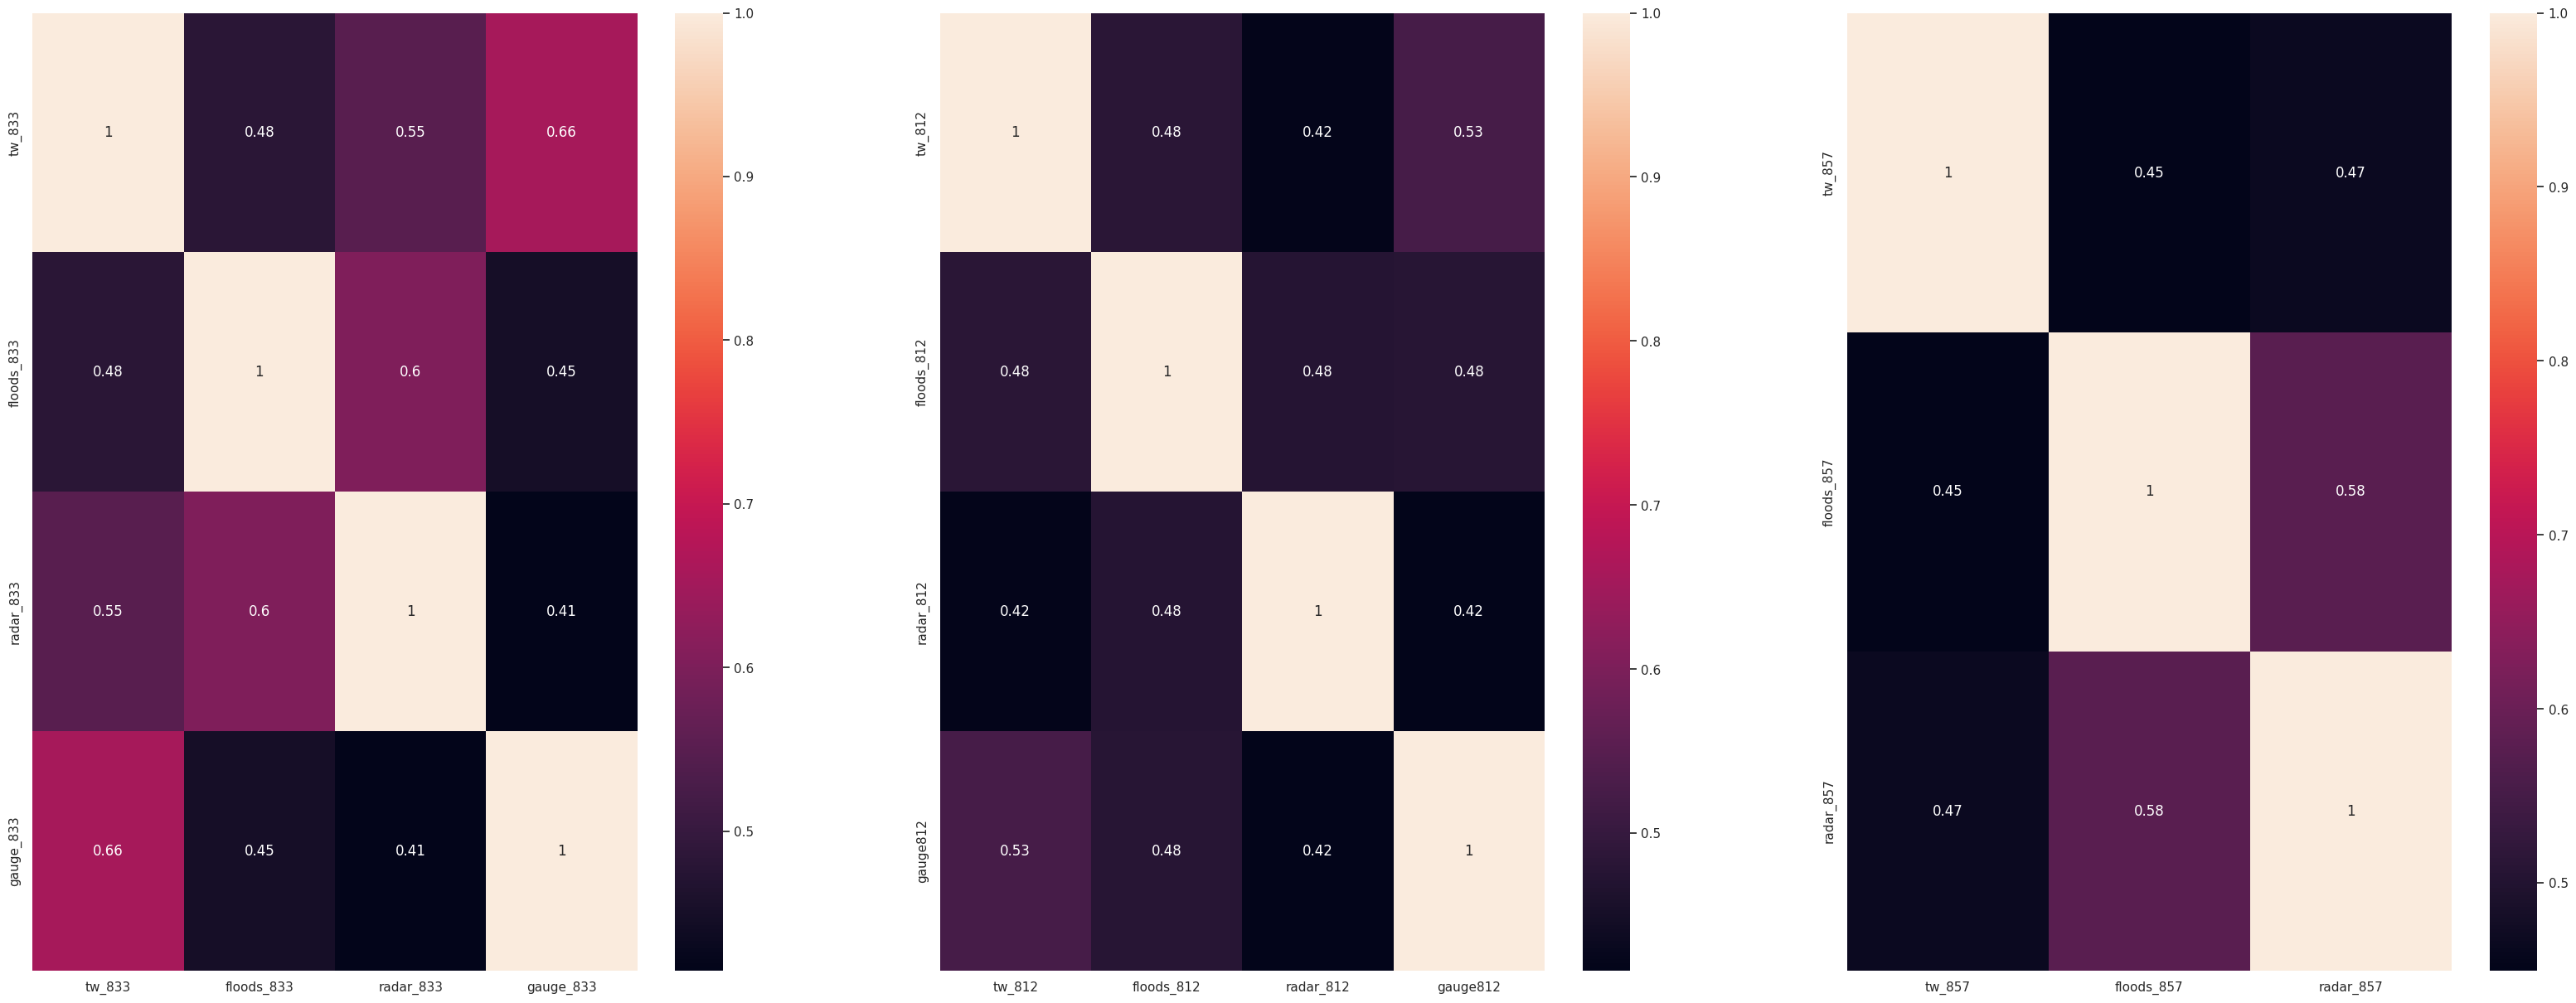

In [115]:
import seaborn as sns
fig, ax =plt.subplots(1,3)
sns.heatmap(integration_data1[['tw_833', 'floods_833', 'radar_833', 'gauge_833']].corr(method='spearman'), annot=True,ax=ax[0])
sns.heatmap(integration_data1[['tw_812', 'floods_812', 'radar_812', 'gauge812']].corr(method='spearman'), annot=True, ax=ax[1])
sns.heatmap(integration_data1[['tw_857', 'floods_857', 'radar_857']].corr(method='spearman'), annot=True, ax=ax[2])

## Correlation for 857

In [116]:
integration_data1[['tw_857', 'floods_857', 'radar_857']].corr(method='spearman')

,tw_857,floods_857,radar_857
tw_857,1.000000,0.449712,0.465424
floods_857,0.449712,1.000000,0.577723
radar_857,0.465424,0.577723,1.000000


In [117]:
corrs, pvals = spearmanr(integration_data1[['tw_857', 'floods_857', 'radar_857']], axis=0)
pvals

array([[0.00000000e+00, 8.72080178e-06, 3.79683767e-06],
       [8.72080178e-06, 0.00000000e+00, 2.49592765e-09],
       [3.79683767e-06, 2.49592765e-09, 0.00000000e+00]])

## Aditional statistics

### Total of tweets in each point

In [118]:
for i in range(0, len(tweet_list)):
  print(len(tweet_list[i]))

17493
89114
79896


### Total of tweets after filtering the tweets

In [119]:
for i in range(0, len(tw_filter_list)):
  print(len(tw_filter_list[i]))

139
548
492


### Percentage of filtered tweets

In [120]:
for i in range(0, len(tw_filter_list)):
  print(len(tw_filter_list[i])/len(tweet_list[i])*100)

0.7946035557079975
0.6149426577193258
0.6158005407029138


In [121]:
temporal_series.words_fr_833a.unique(
)

array([ 2,  1,  5, 11,  9,  4,  0,  6,  3,  8, 18,  7, 10, 14, 26, 12, 25,
       19, 17, 16, 21, 13])